# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | tucumcari
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | laurel
Processing Record 9 of Set 1 | tazovskiy
Processing Record 10 of Set 1 | torva
Processing Record 11 of Set 1 | coolum beach
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | tifton
Processing Record 15 of Set 1 | illoqqortoormiut
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | tsienyane
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | foshan
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | palabu

Processing Record 48 of Set 4 | cape town
Processing Record 49 of Set 4 | novyy svit
Processing Record 0 of Set 5 | kristiinankaupunki
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | feicheng
Processing Record 3 of Set 5 | wasilla
Processing Record 4 of Set 5 | sept-iles
Processing Record 5 of Set 5 | abu kamal
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | havre-saint-pierre
Processing Record 8 of Set 5 | corcoran
Processing Record 9 of Set 5 | warqla
Processing Record 10 of Set 5 | bandarbeyla
Processing Record 11 of Set 5 | mehamn
Processing Record 12 of Set 5 | palimbang
Processing Record 13 of Set 5 | carutapera
Processing Record 14 of Set 5 | arraial do cabo
Processing Record 15 of Set 5 | cayenne
Processing Record 16 of Set 5 | aljezur
Processing Record 17 of Set 5 | port-cartier
Processing Record 18 of Set 5 | hithadhoo
Processing Record 19 of Set 5 | chumikan
Processing Record 20 of Set 5 | lokosovo
Processing Record 21 of Set 5 | s

Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | dublin
Processing Record 49 of Set 8 | sembe
Processing Record 0 of Set 9 | fuerte olimpo
Processing Record 1 of Set 9 | bairiki
Processing Record 2 of Set 9 | bangassou
Processing Record 3 of Set 9 | vaitupu
Processing Record 4 of Set 9 | vila velha
Processing Record 5 of Set 9 | shenzhen
Processing Record 6 of Set 9 | sokoni
Processing Record 7 of Set 9 | ibirama
Processing Record 8 of Set 9 | ko samui
Processing Record 9 of Set 9 | todos santos
Processing Record 10 of Set 9 | sao raimundo nonato
Processing Record 11 of Set 9 | kazalinsk
Processing Record 12 of Set 9 | kununurra
Processing Record 13 of Set 9 | fort nelson
Processing Record 14 of Set 9 | peto
Processing Record 15 of Set 9 | kumluca
Processing Record 16 of Set 9 | pisco
Processing Record 17 of Set 9 | victoria
Processing Record 18 of Set 9 | san juan
Processing Record 19 of Set 9 | haines junction
Processing Record 20 of Set 9 | palana
Processing Recor

Processing Record 44 of Set 12 | komsomolskiy
Processing Record 45 of Set 12 | tunceli
Processing Record 46 of Set 12 | egvekinot
Processing Record 47 of Set 12 | hami
Processing Record 48 of Set 12 | kalmunai
Processing Record 49 of Set 12 | kudahuvadhoo
Processing Record 0 of Set 13 | svetlogorsk
Processing Record 1 of Set 13 | jiexiu
Processing Record 2 of Set 13 | tumannyy
Processing Record 3 of Set 13 | joigny
Processing Record 4 of Set 13 | boda
Processing Record 5 of Set 13 | pak phanang
Processing Record 6 of Set 13 | zachagansk
Processing Record 7 of Set 13 | prince rupert
Processing Record 8 of Set 13 | manono
Processing Record 9 of Set 13 | monteagudo
Processing Record 10 of Set 13 | yeppoon
Processing Record 11 of Set 13 | omaruru
Processing Record 12 of Set 13 | tautira
Processing Record 13 of Set 13 | inuvik
Processing Record 14 of Set 13 | havelock
Processing Record 15 of Set 13 | tura
Processing Record 16 of Set 13 | pionerskiy
Processing Record 17 of Set 13 | teguise
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,4.40,45,6,2.36,JP,1674696270
1,bluff,-46.6000,168.3333,19.47,57,21,1.87,NZ,1674696270
2,vaini,-21.2000,-175.2000,29.09,89,40,4.12,TO,1674696270
3,mataura,-46.1927,168.8643,26.31,29,87,2.01,NZ,1674696271
4,tucumcari,35.1717,-103.7250,-1.09,64,100,2.06,US,1674696271


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuura,35.1333,140.3000,4.40,45,6,2.36,JP,1674696270
1,bluff,-46.6000,168.3333,19.47,57,21,1.87,NZ,1674696270
2,vaini,-21.2000,-175.2000,29.09,89,40,4.12,TO,1674696270
3,mataura,-46.1927,168.8643,26.31,29,87,2.01,NZ,1674696271
4,tucumcari,35.1717,-103.7250,-1.09,64,100,2.06,US,1674696271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

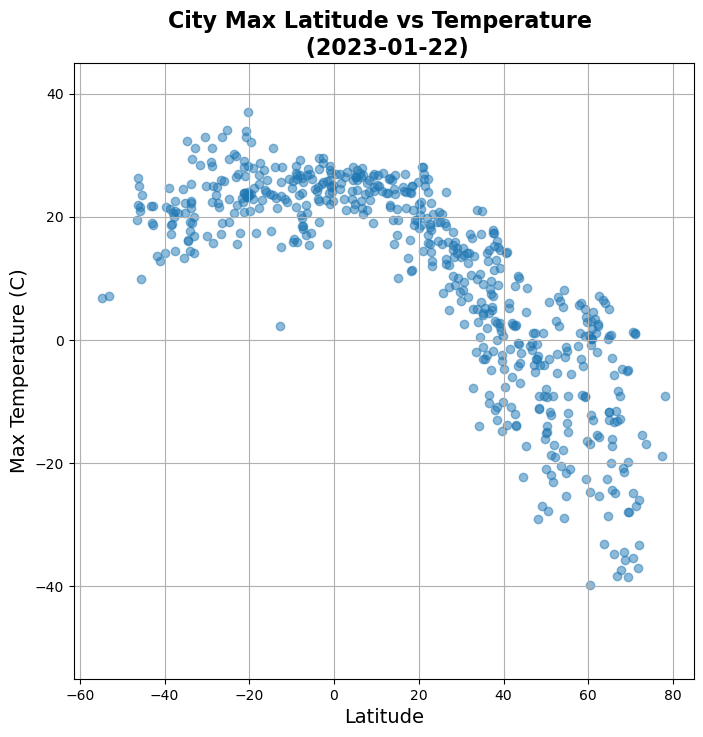

In [8]:
# Build scatter plot for latitude vs. temperature
# city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,5), c='DarkGreen',
              # title="City Max Latitude vs Temperature (2023-01-22)")
    
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)

# Incorporate the other graph properties

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.ylim(-55,45)
plt.title('City Max Latitude vs Temperature \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

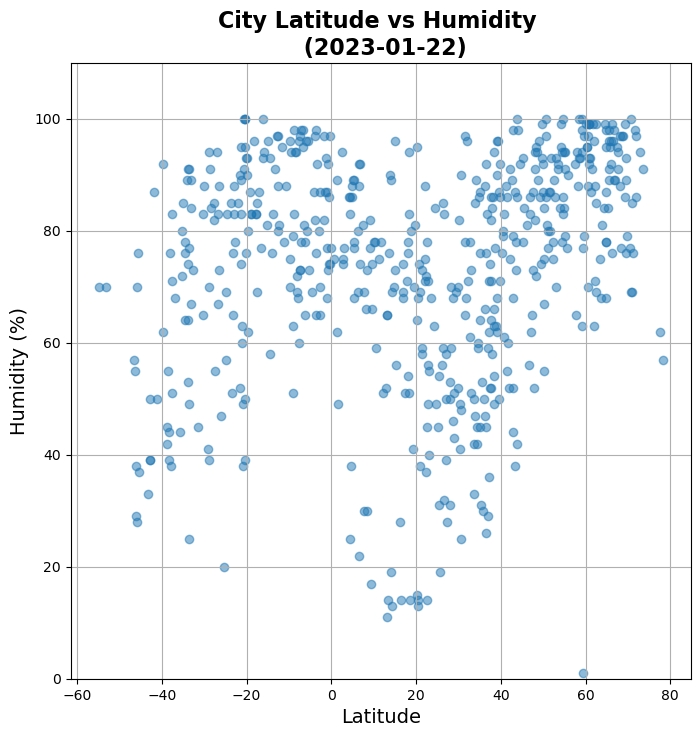

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)


# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.ylim(0,110)
plt.title('City Latitude vs Humidity \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

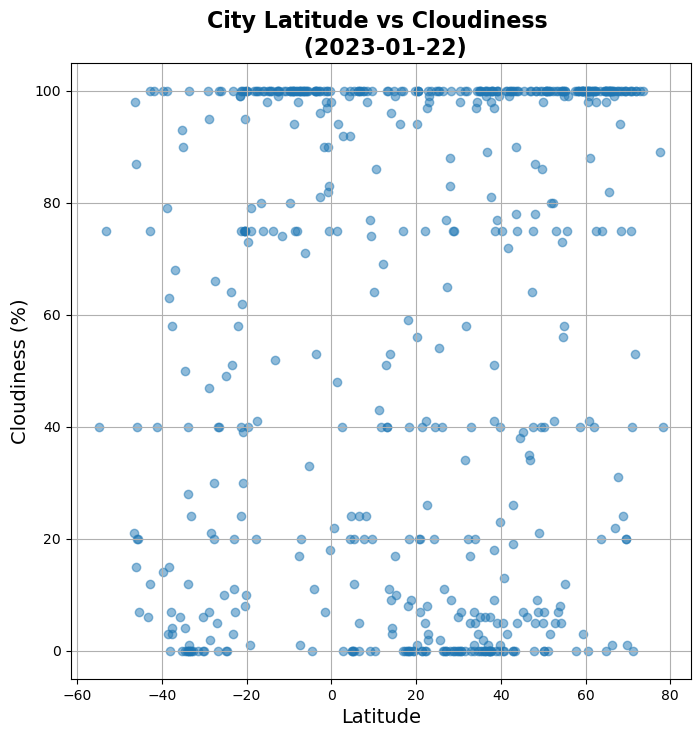

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.ylim(-5,105)
plt.title('City Latitude vs Cloudiness \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

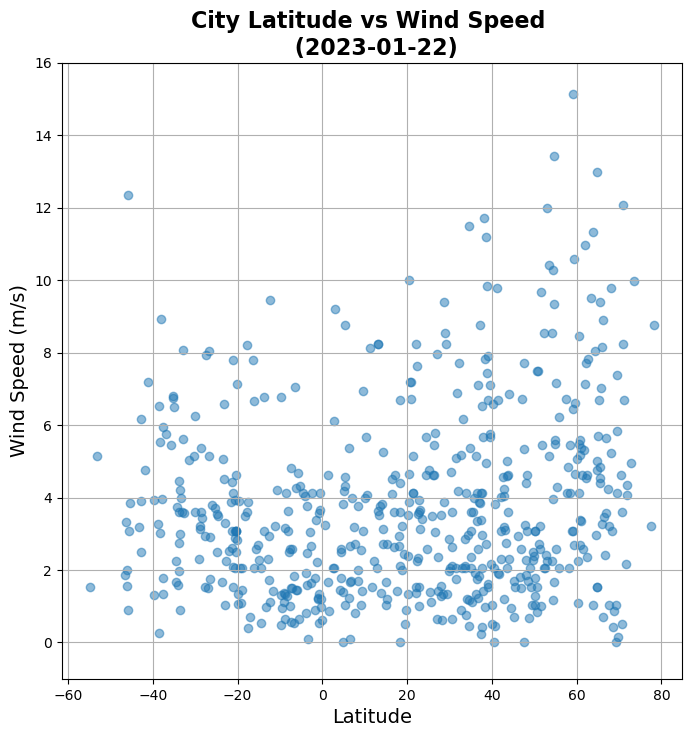

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.figure(figsize=(8,8))
plt.scatter(x_values,y_values, alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.ylim(-1,16)
plt.title('City Latitude vs Wind Speed \n (2023-01-22)', fontweight='bold', fontsize=16)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots

def lin_reg_plot(x_series, y_series):
    
    # calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
    regress_values = x_series * slope + intercept
    
    # print r-value
    print(f'The r-value is: {rvalue}')
    
    # plot
    plt.scatter(x_series, y_series, alpha=0.5)
    plt.plot(x_series,regress_values, color='red')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel('Latitude')
    #plt.show()
    
    return line_eq, plt   

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuura,35.1333,140.3000,4.40,45,6,2.36,JP,1674696270
4,tucumcari,35.1717,-103.7250,-1.09,64,100,2.06,US,1674696271
6,yellowknife,62.4560,-114.3525,-15.71,85,75,4.63,CA,1674696043
7,laurel,39.0993,-76.8483,11.70,96,100,1.54,US,1674696272
8,tazovskiy,67.4667,78.7000,-12.78,95,100,4.23,RU,1674696272


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bluff,-46.6000,168.3333,19.47,57,21,1.87,NZ,1674696270
2,vaini,-21.2000,-175.2000,29.09,89,40,4.12,TO,1674696270
3,mataura,-46.1927,168.8643,26.31,29,87,2.01,NZ,1674696271
5,busselton,-33.6500,115.3333,22.24,49,0,3.00,AU,1674696272
10,coolum beach,-26.5333,153.1000,32.97,73,40,2.90,AU,1674696273


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8333970186044465


Text(0, -20, 'y = -0.7x + 31.1')

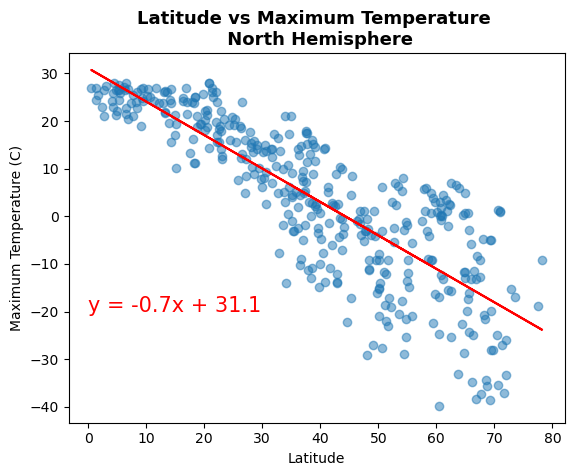

In [68]:
# Linear regression on Northern Hemisphere
plt.ylabel('Maximum Temperature (C)')
plt.title('Latitude vs Maximum Temperature \n North Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
temp_plt.annotate(temp_lat_graph,(0,-20),fontsize=15,color="red")
#print(type(temp_lat_graph))

The r-value is: 0.288987959286036


Text(-30, 10, 'y = 0.11x + 25.32')

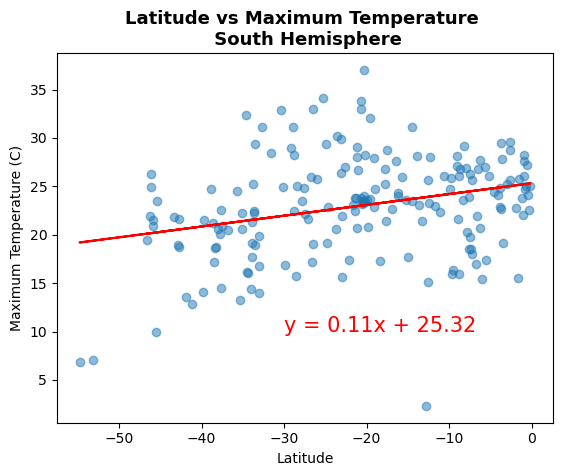

In [69]:
# Linear regression on Southern Hemisphere
plt.ylabel('Maximum Temperature (C)')
plt.title('Latitude vs Maximum Temperature \n South Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
temp_plt.annotate(temp_lat_graph,(-30,10),fontsize=15,color="red")

From the graphs above we can conclude that the temperature tends to drop the further away from 0 point latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4388257072340809


Text(40, 20, 'y = 0.48x + 53.96')

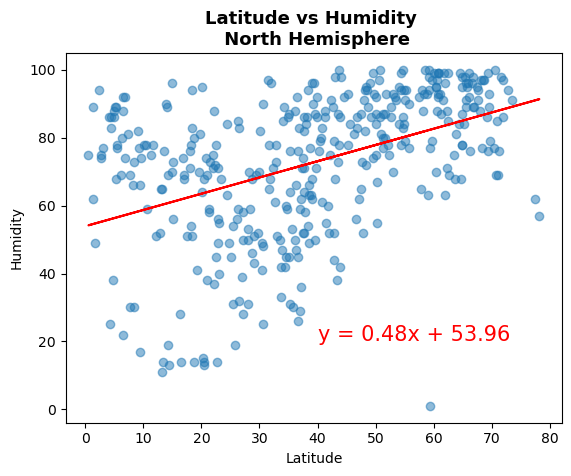

In [70]:
# Northern Hemisphere
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity \n North Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
temp_plt.annotate(temp_lat_graph,(40,20),fontsize=15,color="red")

The r-value is: 0.47556245141444914


Text(-30, 30, 'y = 0.65x + 88.27')

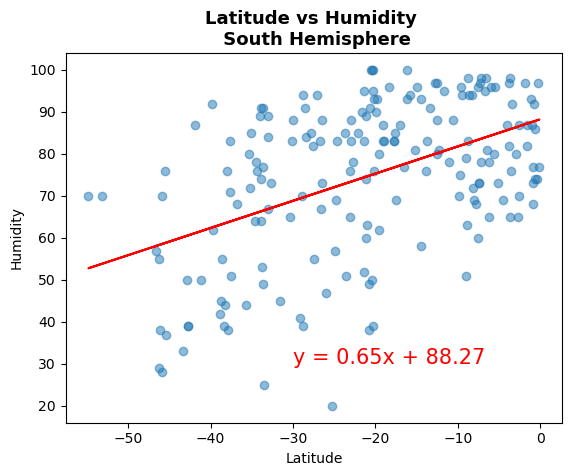

In [72]:
# Southern Hemisphere
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity \n South Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
temp_plt.annotate(temp_lat_graph,(-30,30),fontsize=15,color="red")

The r-values for correlation betweeb latitude and humidity suggest relatively low association between two variables. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2752083222407564


Text(0, 58, 'y = 0.6x + 33.92')

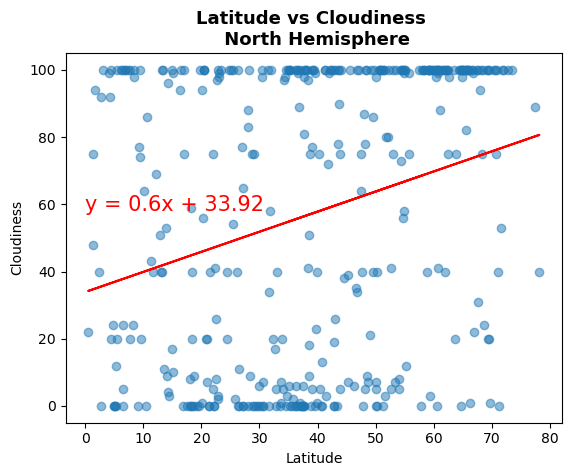

In [73]:
# Northern Hemisphere
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness \n North Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
temp_plt.annotate(temp_lat_graph,(0,58),fontsize=15,color="red")

The r-value is: 0.48543535526506704


Text(-55, 55, 'y = 1.43x + 90.66')

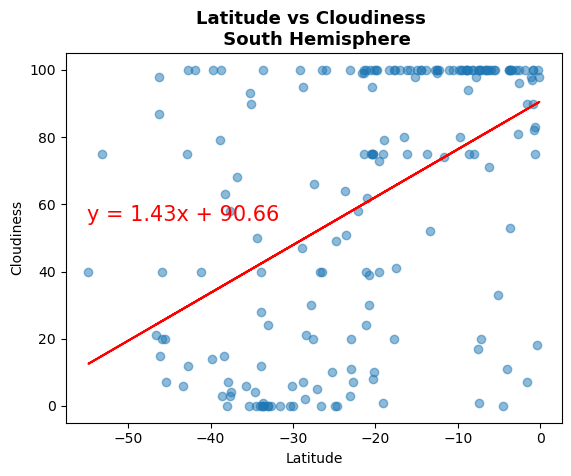

In [74]:
# Southern Hemisphere
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness \n South Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
temp_plt.annotate(temp_lat_graph,(-55,55),fontsize=15,color="red")

There is stronger correlation between cloudiness and latitude in south hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.22245248389368127


Text(5, 12.5, 'y = 0.03x + 2.77')

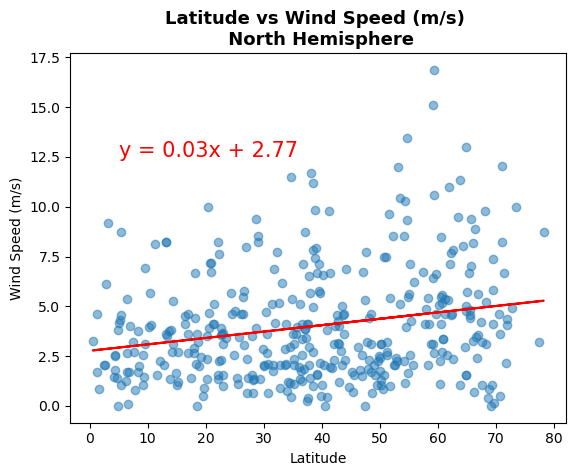

In [78]:
# Northern Hemisphere
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed (m/s) \n North Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
temp_plt.annotate(temp_lat_graph,(5,12.5),fontsize=15,color="red")

The r-value is: -0.3022253898424383


Text(-50, 10, 'y = -0.05x + 2.27')

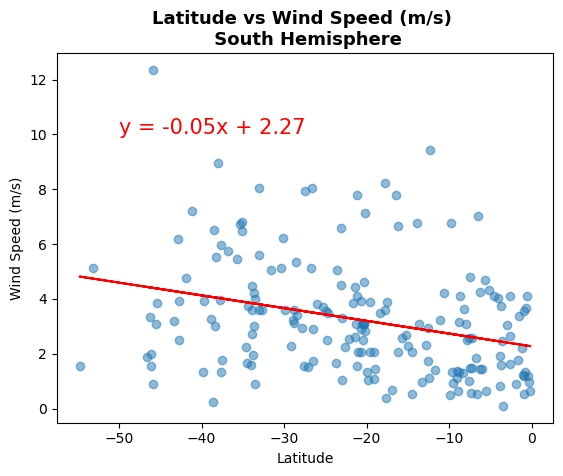

In [75]:
# Southern Hemisphere
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed (m/s) \n South Hemisphere', fontweight='bold', fontsize=13)
temp_lat_graph, temp_plt = lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
temp_plt.annotate(temp_lat_graph,(-50,10),fontsize=15,color="red")

Low correlation between latitude and wind speed in both hemispheres. 